In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

source="/var/home/buonhobo/IdeaProjects/platinum_experiments_proper/domains/risk_assessment/collected_data/all_data2.csv"
df=data=pd.read_csv(source)
df['human foam']=6-df['robot foam']
df['human wood']=6-df['robot wood']
df['human metal']=6-df['robot metal']
df['collision score']=2*df['foam collisions'] + 5*df['wood collisions'] + 8*df['metal collisions']
df

,run id,shared,expertise,strategy,time to plan,average risk,max risk,foam collisions,wood collisions,metal collisions,...,human makespan,best robot makespan,estimated robot makespan,robot foam,robot wood,robot metal,human foam,human wood,human metal,collision score
0,0,6,unexp,RiskAssessmentPlanner,176781,0.009412,0.031360,0,0,1,...,92.0,97.000000,112.000000,6,0,1,0,6,5,8
1,1,6,unexp,RiskAssessmentPlanner,149871,0.005308,0.125440,0,0,0,...,42.0,86.285714,86.285714,6,0,6,0,6,0,0
2,2,6,unexp,RiskAssessmentPlanner,123798,0.024028,0.107520,1,0,1,...,78.0,81.857143,104.000000,2,6,1,4,0,5,10
3,3,6,unexp,RiskAssessmentPlanner,142080,0.029821,0.107520,2,0,1,...,78.0,77.571429,102.571429,2,6,1,4,0,5,12
4,4,6,unexp,RiskAssessmentPlanner,136827,0.005308,0.125440,0,0,0,...,42.0,86.285714,86.285714,6,0,6,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,2,unexp,Planner,20069,0.003106,0.037856,1,0,1,...,58.0,188.142857,201.476190,4,4,3,2,2,3,10
156,156,2,unexp,Planner,20212,0.002598,0.019600,1,1,0,...,65.0,197.619048,232.619048,3,4,3,3,2,3,7
157,157,2,unexp,Planner,19613,0.001648,0.029400,1,0,1,...,48.0,252.952381,276.285714,4,4,4,2,2,2,10
158,158,2,unexp,Planner,19483,0.004758,0.071120,2,0,1,...,48.0,189.142857,212.476190,4,4,4,2,2,2,12


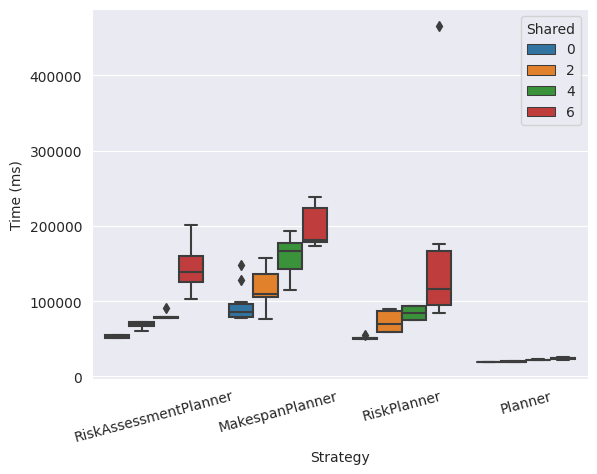

In [11]:
### Time per strategy ###

# Create a box plot for time taken by each strategy, grouped by 'shared'
sns.boxplot(x="strategy", y="time to plan", hue="shared", data=df)

# Customize the axes labels
plt.xlabel("Strategy")
plt.ylabel("Time (ms)")

plt.xticks(rotation=15)
# Add a legend
plt.legend(title="Shared")

# Show the plot
plt.savefig('time_to_plan-strategy')

In [ ]:
    # Create a FacetGrid to visualize multiple graphs in a grid
g = sns.FacetGrid(df, col="shared", row="expertise", margin_titles=True)

# Plot makespan vs risk in a scatter plot
g.map_dataframe(sns.scatterplot, x="best makespan", y="average risk", hue="strategy", style="strategy", palette="deep", alpha=0.8)

# Customize the axes labels
g.set_axis_labels("Makespan", "Risk (log)")

# Set the y-axis to logarithmic scale
g.set(yscale="log")

# Add a legend
g.add_legend()

# Show the plot
plt.savefig('risk-makespan-shared')

In [ ]:
### Risk-Makespan Tradeoff ###

# Create a FacetGrid to visualize multiple graphs in a grid
g = sns.FacetGrid(df, col="strategy", row="expertise", margin_titles=True)

# Plot makespan vs risk in a scatter plot
g.map_dataframe(sns.scatterplot, x="best makespan", y="average risk", hue="shared", style="shared", palette="deep", alpha=0.8)

# Customize the axes labels
g.set_axis_labels("Makespan", "Risk (log)")

# Set the y-axis to logarithmic scale
g.set(yscale="log")

# Add a legend
g.add_legend()

# Show the plot
plt.savefig('risk-makespan-strategy')

In [ ]:
import numpy as np

# Filter data for shared=6 and group by strategy
df_grouped = df[df['shared']==6].groupby(['strategy']).sum()

# Create new dataframe with columns for each kind of cube
df_plot = pd.DataFrame({
    'Robot Foam': df_grouped['robot foam'],
    'Human Foam': df_grouped['human foam'],
    'Robot Wood': df_grouped['robot wood'],
    'Human Wood': df_grouped['human wood'],
    'Robot Metal': df_grouped['robot metal'],
    'Human Metal': df_grouped['human metal']
})

# Set width of bars and positions of x-tick labels
width = 0.25
pos = np.arange(len(df_plot.index))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10,8))

# Plot the stacked bar chart for each kind of cube
ax.bar(pos, df_plot['Robot Foam'], width, label='Robot Foam', color='blue')
ax.bar(pos, df_plot['Human Foam'], width, bottom=df_plot['Robot Foam'], label='Human Foam', color='grey')
ax.bar(pos+width, df_plot['Robot Wood'], width, label='Robot Wood', color='orange')
ax.bar(pos+width, df_plot['Human Wood'], width, bottom=df_plot['Robot Wood'], label='Human Wood', color='grey')
ax.bar(pos+2*width, df_plot['Robot Metal'], width, label='Robot Metal', color='green')
ax.bar(pos+2*width, df_plot['Human Metal'], width, bottom=df_plot['Robot Metal'], label='Human Metal', color='grey')

# Set the x-tick labels and add legend
ax.set_xticks(pos+width)
ax.set_xticklabels(df_plot.index)
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Strategy')
ax.set_ylabel('Number of Cubes')
ax.set_title('Assignments of Cubes to Robot and Human')

# Display the plot
plt.show()


In [ ]:
# Create a grouped bar chart showing the number of foam collisions, wood collisions, and metal collisions by actor
collisions_data = data.groupby(['strategy']).sum()[['foam collisions', 'wood collisions', 'metal collisions']]
ax = collisions_data.plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xlabel('Strategy')
ax.set_ylabel('Number of Collisions')
ax.legend(['Foam', 'Wood', 'Metal'], loc='upper left')
plt.show()

In [ ]:
    # Create a FacetGrid to visualize multiple graphs in a grid
g = sns.FacetGrid(df, col="shared", row="expertise", margin_titles=True)

# Plot makespan vs risk in a scatter plot
g.map_dataframe(sns.scatterplot, x="best makespan", y="collision score", hue="strategy", style="strategy", palette="deep", alpha=0.8)

# Customize the axes labels
g.set_axis_labels("Makespan", "Collision score")

# Add a legend
g.add_legend()

# Show the plot
plt.savefig('collision_score-makespan-shared')

In [ ]:
    # Create a FacetGrid to visualize multiple graphs in a grid
g = sns.FacetGrid(df, col="strategy", row='expertise' ,margin_titles=True)

# Plot makespan vs risk in a scatter plot
g.map_dataframe(sns.scatterplot, x="best makespan", y="collision score", hue="shared", style="shared", palette="deep", alpha=0.8)

# Customize the axes labels
g.set_axis_labels("Makespan", "Collision score")

# Add a legend
g.add_legend()

# Show the plot
plt.savefig('collision_score-makespan-strategy')